In [38]:
# Import
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

realtor_data = "Resources/RealtorData.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df
# data_types = realtor_file_df.dtypes
# data_types

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [39]:
# Dropping the duplicates
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


In [40]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0,No
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0,Yes
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0,Yes
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0,Yes


In [41]:
realtor_file_df.fillna(0,inplace=True)


In [42]:
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.00,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.00,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.00,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.00,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes
465516,for_sale,1.0,1.0,0.00,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1117009,for_sale,0.0,1.0,0.00,New York,New York,11432.0,0.0,2015-04-09,150000.0,Yes
1117465,for_sale,4.0,3.0,0.00,New York,New York,11375.0,2200.0,2021-10-18,1825500.0,Yes
1117972,for_sale,1.0,1.0,0.00,New York,New York,11375.0,0.0,2006-09-13,350000.0,Yes
1118260,for_sale,4.0,3.0,0.00,New York,New York,11423.0,0.0,1987-06-12,990000.0,Yes


In [43]:
new_york_df2 = new_york_df.copy()

In [44]:
new_york_df2.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes


# Visualisation of the data to show Price by Zip Code

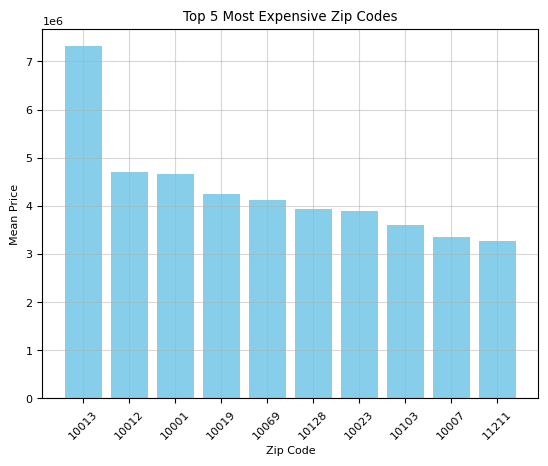

In [45]:
# Convert zip_code to string data type and extract numeric part
new_york_df2['zip_code_num'] = new_york_df2['zip_code'].astype(str).str.extract('(\d+)')

# Calculate mean price for each zip code
mean_price = new_york_df2.groupby('zip_code_num')['price'].mean()

# Sort zip codes by mean price in descending order
most_expensive_zips = mean_price.sort_values(ascending=False).head(10)

# Sort zip codes by mean price in ascending order
least_expensive_zips = mean_price.sort_values().head(10)

# Plot top 5 most expensive zip codes
plt.bar(most_expensive_zips.index, most_expensive_zips.values, color='skyblue')
plt.title('Top 5 Most Expensive Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 8
plt.show()

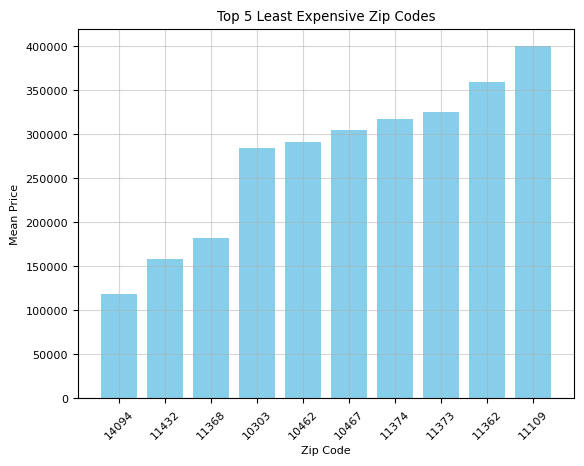

In [46]:
# Plot top 5 least expensive zip codes
plt.bar(least_expensive_zips.index, least_expensive_zips.values, color='skyblue')
plt.title('Top 5 Least Expensive Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 8
plt.show()

# Analysis of the Price by Zip Code
So, after taking a quick look at the data, I can easily spot which zip codes are living the high life and which ones are more budget-friendly. This helps us figure out what's driving the real estate scene. By checking out the price differences in different areas, we get a sense of the mix of factors like income, people, and location that shape how things play out in the housing market. Knowing this stuff comes in handy for making smart choices, whether you're thinking about investments, predicting where the market's headed, or considering new rules and policies.